In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [2]:
def plot_feature_importances(clf):
    n_features = X.shape[1]
    plt.figure(figsize = (10, 30))
    plt.barh(range(n_features), clf.feature_importances_, align ='center')
    plt.yticks(np.arange(n_features),X.columns)
    plt.xlabel('Importance des features')
    plt.ylabel('Feature')
    plt.ylim(-1, n_features)


In [3]:
data=pd.read_csv('C:/Users/theop\Documents/000AAA DATASCIENTIST/000 PROJET AUS\meteo_knn_imputer.csv')
data.head(3)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90122 entries, 0 to 90121
Data columns (total 96 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   MinTemp                    90122 non-null  float64
 1   MaxTemp                    90122 non-null  float64
 2   Rainfall                   90122 non-null  float64
 3   Evaporation                90122 non-null  float64
 4   Sunshine                   90122 non-null  float64
 5   WindGustSpeed              90122 non-null  float64
 6   WindSpeed9am               90122 non-null  float64
 7   WindSpeed3pm               90122 non-null  float64
 8   Humidity9am                90122 non-null  float64
 9   Humidity3pm                90122 non-null  float64
 10  Pressure9am                90122 non-null  float64
 11  Pressure3pm                90122 non-null  float64
 12  Cloud9am                   90122 non-null  float64
 13  Cloud3pm                   90122 non-null  flo

In [4]:
X = data.drop('RainTomorrow', axis = 1)
y = data['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state = 16)

In [5]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 200)

In [6]:
rf.fit(X_train,y_train)
display(rf.score(X_train,y_train))
display(rf.score(X_test,y_test))
y_pred = rf.predict(X_test)

1.0

0.860748959778086

Importance des features selon la fonction plot_features_importances

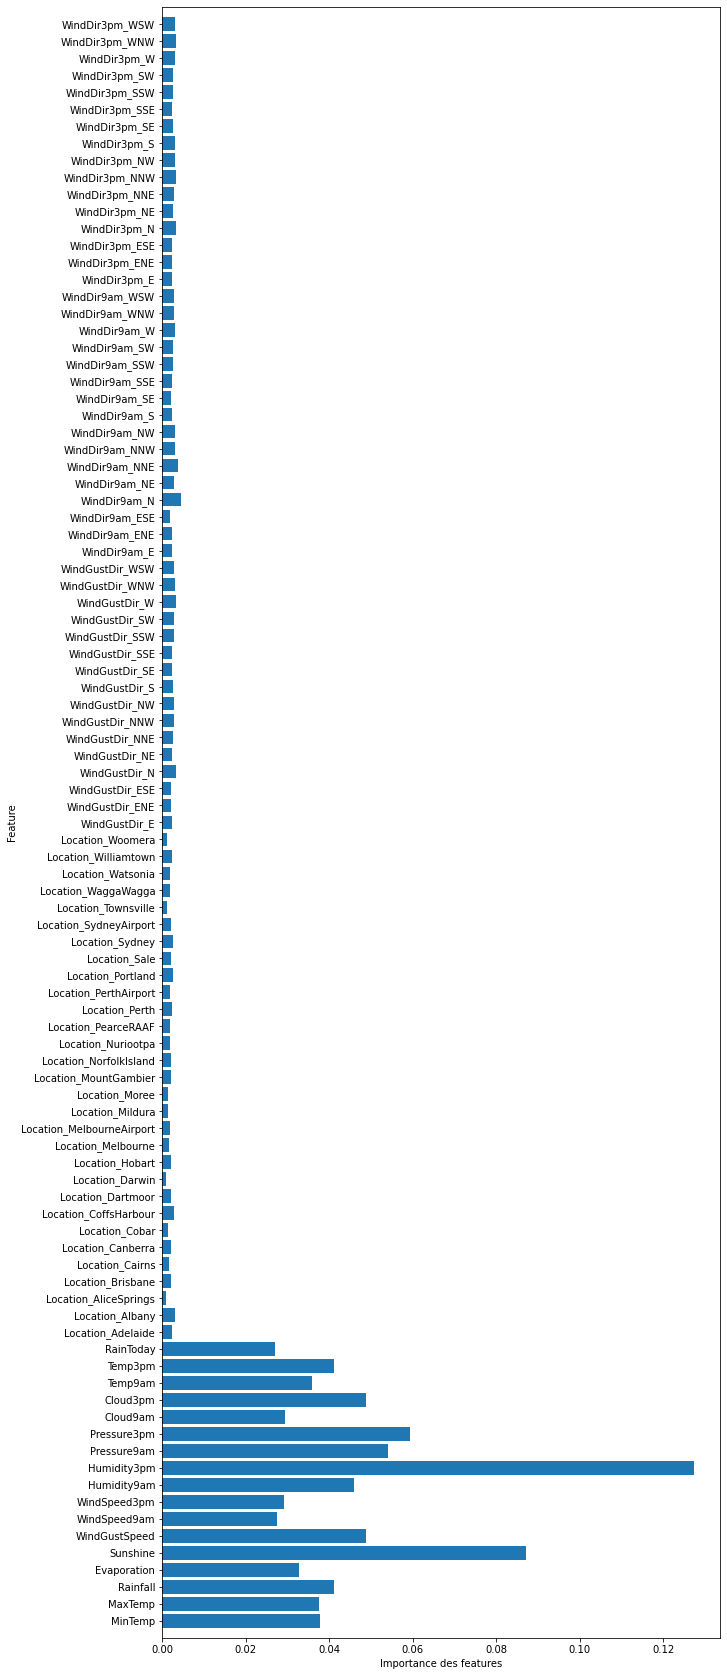

In [11]:
plot_feature_importances(rf)

ACP

c:\Users\theop\Documents\Python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


(-0.8, 0.8)

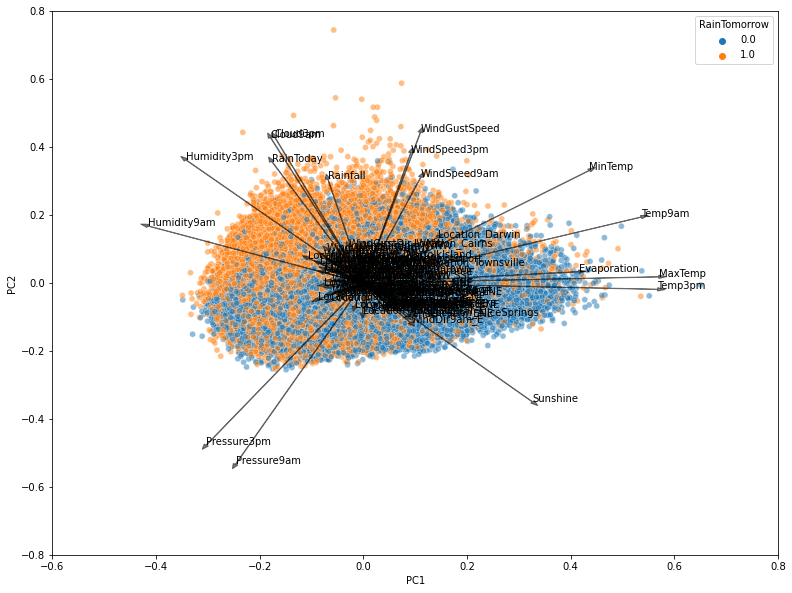

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns

### BROUILLON

n = X_train.shape[1]

pca = PCA(n_components=2)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_new = pca.fit_transform(X_train_scaled)

coeff = pca.components_.transpose()

xs = X_new[:, 0]
ys = X_new[:, 1]
scalex = 1.0/(xs.max() - xs.min())
scaley = 1.0/(ys.max() - ys.min())


principalDf = pd.DataFrame({'PC1': xs*scalex, 'PC2': ys * scaley})

y_train_pred = rf.predict(X_train_scaled)
finalDF = pd.concat([principalDf, pd.Series(
    y_train_pred, name='RainTomorrow')], axis=1)


plt.figure(figsize=(13, 10))

sns.scatterplot(x='PC1', y='PC2', hue='RainTomorrow', data=finalDF, alpha=0.5)

for i in range(n):
    plt.arrow(0, 0, coeff[i, 0]*1.5, coeff[i, 1]*1.5,
              color='k', alpha=0.5, head_width=0.01, )
    plt.text(coeff[i, 0]*1.5, coeff[i, 1] * 1.5, X_train.columns[i], color='k')

plt.xlim(-0.6, 0.8)
plt.ylim(-0.8, 0.8)